<center>
<h1> Walmart Store Sales Prediction 
</center>

### Steps for Forecasting Modelling

1. <b>Business Porblem Definition</b> - Predicting Walmart Strore Sales based on certain factors for a Historical Das
2. <b>Convert business problem</b> into statistical problem  sales = F(sales attributes, product features, marketing info etc.)
3. <b>Finding the right technique</b> - Since it is predicting value (Regression Problem) problem so we can use OLS as one of the technique. We can also use other Machine Learning techniques like Decision Trees, Ensemble learning, KNN, SVM, ANN etc.
4. <b>Data colletion(Y, X)</b> - Identify the sources of information and collect the data
5. <b>Consolidate the data</b> - aggregate and consolidate the data at Model level/customer level/store level depends on business problem
6. <b>Data preparation for modeling</b> (create data audit report to identify the steps to perform as part of data preparation)
    a. missinmg value treatment
    b. outlier treatment
    c. dummy variable creation
7. Variable creation by using transformation and derived variable creation.
8. <b>Basic assumptions</b> (Normality, linearity, no outliers, homoscadasticity, no pattern in residuals, no auto correlation etc)
9. Variable reduction techniques (removing multicollinerity with the help of FA/PCA, correlation matrics, VIF)
10. Create dev and validation data sets (50:50 if you have more data else 70:30 or 80:20)
11. Modeling on dev data set (identify significant variables, model interpretation, check the signs and coefficients, multi-collinierity check, measures of good neess fit, final mathematical equation etc)
12. validating on validation data set (check the stability of model, scoring, decile analysis, cross validation etc.)
13. Output interpretation and derive insights (understand the limitations of the model and define strategy to implementation)
14. convert statistical solution into business solutions (implementation, model monitoring etc)

### Approach

1. For entire Data we will build predictive modelling by converting the problem into Linear Regression Model along where Weekly_Sales will be considered as Y and remaining X 

2. We will predict Time Series forecast for above Model

### Packages

In [95]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')

#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pandas_profiling
import scipy.stats as stats

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics

#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Modules related to preprocessing (Imputation of missings, standardiszation, new features creation, converting categorical to numerical)
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder

#Moudles related to feature selection
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2, SelectPercentile, f_classif, mutual_info_classif, f_regression, VarianceThreshold, SelectFromModel, mutual_info_classif, mutual_info_regression, SelectFpr, SelectFdr, SelectFwe


#Modules related to pipe line creation for faster processing
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
#from sklearn.features.transformers import DataFrameSelector

#Modules related to saving python objects permanantly
from sklearn.externals import joblib

#Dumping model into current directory: joblib.dump(model_xg,"my_model.pkl") 
#Loading model: my_model_loaded=joblib.load("my_model.pkl")

#Modules related key techniques of supervised learning 
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa

from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, export
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
#from xgboost import XGBClassifier, XGBRegressor
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn import ensemble,linear_model,neighbors,metrics,tree

<Figure size 432x216 with 0 Axes>

### Data Audit 

1. Import Data
2. Data Preparation

#### Import data

In [2]:
train_data = pd.read_csv('H:/Machine Learning/6. Machine Learning- Final Projects Submission/1. Supervised Learning(Regression,Classification,Forecasting)/2. Walmart Store Sales Forecasting (extract.me)/data/train.csv')
test_data = pd.read_csv('H:/Machine Learning/6. Machine Learning- Final Projects Submission/1. Supervised Learning(Regression,Classification,Forecasting)/2. Walmart Store Sales Forecasting (extract.me)/data/test.csv')

features = pd.read_csv('H:/Machine Learning/6. Machine Learning- Final Projects Submission/1. Supervised Learning(Regression,Classification,Forecasting)/2. Walmart Store Sales Forecasting (extract.me)/data/features.csv')
stores = pd.read_csv('H:/Machine Learning/6. Machine Learning- Final Projects Submission/1. Supervised Learning(Regression,Classification,Forecasting)/2. Walmart Store Sales Forecasting (extract.me)/data/stores.csv')

In [3]:
train_data.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
test_data.head(5)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [5]:
features.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
stores.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


#### Merge Table to Create final DataSet for Train and Test

In [7]:
## Train Data

train_mid = pd.merge(train_data,stores)
Train_Data = pd.merge(train_mid,features)

In [8]:
Train_Data.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [9]:
### Test Data

test_mid = pd.merge(test_data,stores)
Test_Data = pd.merge(test_mid,features)

In [10]:
Test_Data.head(5)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [11]:
#Difference of 1 Column in Test Data where Weekly Sales are not defined which we need to Identify using Linear Model

print(Train_Data.shape)
print(Test_Data.shape)

(421570, 16)
(115064, 15)


In [12]:
print(Train_Data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB
None


In [13]:
print(Test_Data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
Store           115064 non-null int64
Dept            115064 non-null int64
Date            115064 non-null object
IsHoliday       115064 non-null bool
Type            115064 non-null object
Size            115064 non-null int64
Temperature     115064 non-null float64
Fuel_Price      115064 non-null float64
MarkDown1       114915 non-null float64
MarkDown2       86437 non-null float64
MarkDown3       105235 non-null float64
MarkDown4       102176 non-null float64
MarkDown5       115064 non-null float64
CPI             76902 non-null float64
Unemployment    76902 non-null float64
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 13.3+ MB
None


#### Missing Values 

In [14]:
print("Number of Missing values in Train data : ",Train_Data.isnull().sum().sum())
print("Number of Missing values in Test data : ",Test_Data.isnull().sum().sum())

Number of Missing values in Train data :  1422431
Number of Missing values in Test data :  127817


In [15]:
#Checking Missing vaslues in Train data

Train_Data.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [16]:
#Checking Missing vaslues in Test data

Test_Data.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64

In [17]:
Train_Data.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


## Data Preparation 

### Generating Profile Report for Train and Test Data

In [47]:
## Train Data

pandas_profiling.ProfileReport(Train_Data)

C:\Users\abhis\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,16
Number of observations,421570
Total Missing (%),21.1%
Total size in memory,51.9 MiB
Average record size in memory,129.0 B
Numeric,13
Categorical,2
Boolean,1
Date,0
Text (Unique),0
Rejected,0


### Observation on Train Data

1. Markdown has Huge <b>NaN</b> values - Need to fix with Missing Values Imputation
2. <b>IsHoliday</b> is having Huge Missing values

In [48]:
## Test Data

pandas_profiling.ProfileReport(Test_Data)

C:\Users\abhis\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,15
Number of observations,115064
Total Missing (%),7.4%
Total size in memory,13.3 MiB
Average record size in memory,121.0 B
Numeric,12
Categorical,2
Boolean,1
Date,0
Text (Unique),0
Rejected,0


### Observation on Test Data

1. <b>Markdown5</b> is highly Skewed

### Generating Date Values from Date Column

In [18]:
#Changing Data type of Date Variable and Extracting month and Year from it.

import calendar

#Train Data
Train_Data['Date'] = pd.to_datetime(Train_Data.Date,format="%Y-%m-%d")
Train_Data['Month']= Train_Data.Date.dt.month.apply(lambda x: calendar.month_abbr[x])
Train_Data['Year'] = Train_Data.Date.dt.year
Train_Data['Day_of_Week'] = Train_Data.Date.dt.dayofweek
Train_Data['Quater'] = Train_Data.Date.dt.quarter

#Modifying existing varaibles
Train_Data['Month'] = Train_Data.Month.astype(str)

In [19]:
#Changing Data type of Date Variable and Extracting month and Year from it.

import calendar

#Test Data
Test_Data['Date'] = pd.to_datetime(Test_Data.Date,format="%Y-%m-%d")
Test_Data['Month']= Test_Data.Date.dt.month.apply(lambda x: calendar.month_abbr[x])
Test_Data['Year'] = Test_Data.Date.dt.year
Test_Data['Day_of_Week'] = Test_Data.Date.dt.dayofweek
Test_Data['Quater'] = Test_Data.Date.dt.quarter

#Modifying existing varaibles
Test_Data['Month'] = Test_Data.Month.astype(str)

In [20]:
Train_Data.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Month,Year,Day_of_Week,Quater
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,Feb,2010,4,1
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,Feb,2010,4,1
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,Feb,2010,4,1
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,Feb,2010,4,1
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,Feb,2010,4,1


In [21]:
Train_Data.IsHoliday.value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

In [22]:
Test_Data.IsHoliday.value_counts()

False    106136
True       8928
Name: IsHoliday, dtype: int64

#### Splitting Data into Numerical and Categorical Values - Train & Test Data [Process Individually]

In [23]:
#Seperating Numerical and categorical data type column names - Train Data

num_col=[key for key in dict(Train_Data.dtypes) if dict(Train_Data.dtypes)[key] in ['int64','int32','float64','float32']]
cat_col=[key for key in dict(Train_Data.dtypes) if dict(Train_Data.dtypes)[key] in ['object','bool','datetime64[ns]']]

#Seperating Numerical and Categorical data

NUM_data_Train = Train_Data[num_col]
Cat_data_Train = Train_Data[cat_col]

In [24]:
#Seperating Numerical and categorical data type column names - Test Data

num_col_test = [key for key in dict(Test_Data.dtypes) if dict(Test_Data.dtypes)[key] in ['int64','int32','float64','float32']]
cat_col_test = [key for key in dict(Test_Data.dtypes) if dict(Test_Data.dtypes)[key] in ['object','bool','datetime64[ns]']]

#Seperating Numerical and Categorical data

NUM_data_Test = Test_Data[num_col_test]
Cat_data_Test = Test_Data[cat_col_test]

In [25]:
NUM_data_Train.head(5)

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Day_of_Week,Quater
0,1,1,24924.50,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,4,1
1,1,2,50605.27,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,4,1
2,1,3,13740.12,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,4,1
3,1,4,39954.04,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,4,1
4,1,5,32229.38,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,4,1


In [26]:
Cat_data_Train.head(5)

,Date,IsHoliday,Type,Month
0,2010-02-05,False,A,Feb
1,2010-02-05,False,A,Feb
2,2010-02-05,False,A,Feb
3,2010-02-05,False,A,Feb
4,2010-02-05,False,A,Feb


In [27]:
Cat_data_Test.head(5)

,Date,IsHoliday,Type,Month
0,2012-11-02,False,A,Nov
1,2012-11-02,False,A,Nov
2,2012-11-02,False,A,Nov
3,2012-11-02,False,A,Nov
4,2012-11-02,False,A,Nov


#### Prepare Audit Report for Continous and Numerical Variable

In [28]:
## Create Data audit Report for continuous variables

def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [29]:
# Create Data audit Report for categorical variables

def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

#### Applying Data Audit --- Before Implementing Missing Value and Outlier Treatment

In [30]:
NUM_data_Train.apply(continuous_var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,421570.0,0.0,9.359084e+06,22.200546,22.00000,12.785297,1.634638e+02,1.000,1.000000,3.000000,5.000000,11.000000,22.00000,33.000000,40.000000,43.000000,45.000000,45.000000
Dept,421570.0,0.0,1.865882e+07,44.260317,37.00000,30.492054,9.297654e+02,1.000,1.000000,4.000000,7.000000,18.000000,37.00000,74.000000,92.000000,95.000000,98.000000,99.000000
Weekly_Sales,421570.0,0.0,6.737219e+09,15981.258123,7612.03000,22711.183519,5.157979e+08,-4988.940,5.000000,59.974500,291.097000,2079.650000,7612.03000,20205.852500,42845.673000,61201.951000,106479.586000,693099.360000
Size,421570.0,0.0,5.764039e+10,136727.915739,140167.00000,60980.583328,3.718632e+09,34875.000,34875.000000,39690.000000,39910.000000,93638.000000,140167.00000,202505.000000,204184.000000,206302.000000,219622.000000,219622.000000
Temperature,421570.0,0.0,2.533217e+07,60.090059,62.09000,18.447931,3.403262e+02,-2.060,18.300000,27.310000,33.980000,46.680000,62.09000,74.280000,83.580000,87.270000,92.810000,100.140000
Fuel_Price,421570.0,0.0,1.416908e+06,3.361027,3.45200,0.458515,2.102356e-01,2.472,2.565000,2.653000,2.720000,2.933000,3.45200,3.738000,3.917000,4.029000,4.202000,4.468000
MarkDown1,150681.0,270889.0,1.091898e+09,7246.420196,5347.45000,8291.221345,6.874435e+07,0.270,17.760000,149.190000,375.200000,2240.270000,5347.45000,9210.900000,15282.470000,21801.350000,41524.030000,88646.760000
MarkDown2,111248.0,310322.0,3.709708e+08,3334.628621,192.00000,9475.357325,8.978240e+07,-265.760,-0.990000,1.950000,6.980000,41.600000,192.00000,1926.940000,8549.740000,16497.470000,50366.600000,104519.540000
MarkDown3,137091.0,284479.0,1.973317e+08,1439.421384,24.60000,9623.078290,9.260364e+07,-29.100,0.060000,0.650000,1.650000,5.080000,24.60000,103.990000,400.090000,1059.900000,63143.290000,141630.610000
MarkDown4,134967.0,286603.0,4.566161e+08,3383.168256,1481.31000,6292.384031,3.959410e+07,0.220,3.970000,28.760000,108.710000,504.220000,1481.31000,3595.040000,7871.420000,12645.960000,35785.260000,67474.850000


In [31]:
NUM_data_Test.apply(continuous_var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,115064.0,0.0,2.558817e+06,22.238207,22.000000,12.809930,1.640943e+02,1.000000,1.000000,3.0000,5.000000,11.000000,22.000000,33.000000,40.000000,43.000000,45.000000,45.000000
Dept,115064.0,0.0,5.101883e+06,44.339524,37.000000,30.656410,9.398155e+02,1.000000,1.000000,4.0000,7.000000,18.000000,37.000000,74.000000,92.000000,95.000000,98.000000,99.000000
Size,115064.0,0.0,1.570597e+10,136497.688921,140167.000000,61106.926438,3.734056e+09,34875.000000,34875.000000,39690.0000,39910.000000,93638.000000,140167.000000,202505.000000,204184.000000,206302.000000,219622.000000,219622.000000
Temperature,115064.0,0.0,6.206760e+06,53.941804,54.470000,18.724153,3.505939e+02,-7.290000,11.440000,23.9800,29.970000,39.820000,54.470000,67.350000,79.480000,83.820000,92.140000,101.950000
Fuel_Price,115064.0,0.0,4.121070e+05,3.581546,3.606000,0.239442,5.733244e-02,2.872000,2.957000,3.1610,3.227000,3.431000,3.606000,3.766000,3.866000,3.951000,4.079000,4.125000
MarkDown1,114915.0,149.0,8.836063e+08,7689.216439,4842.290000,10698.760716,1.144635e+08,-2781.450000,20.840000,189.4900,457.660000,1966.460000,4842.290000,9439.140000,15325.040000,23140.880000,65757.570000,103184.980000
MarkDown2,86437.0,28627.0,3.227602e+08,3734.051729,742.590000,8323.495014,6.928057e+07,-35.740000,0.020000,6.1400,25.770000,180.350000,742.590000,2735.670000,9277.290000,22671.670000,42920.210000,71074.170000
MarkDown3,105235.0,9829.0,2.528890e+08,2403.088666,78.260000,13767.939313,1.895562e+08,-179.260000,0.150000,1.1800,3.100000,15.100000,78.260000,272.580000,698.930000,2361.570000,86476.660000,149483.310000
MarkDown4,102176.0,12888.0,3.429250e+08,3356.219071,840.940000,7570.501545,5.731249e+07,0.220000,2.610000,16.9600,37.360000,155.460000,840.940000,3096.920000,7674.410000,14191.010000,44739.280000,65344.640000
MarkDown5,115064.0,0.0,4.513594e+08,3922.681189,2390.430000,19445.150745,3.781139e+08,-185.170000,269.300000,540.8900,770.883000,1309.300000,2390.430000,4227.270000,6966.340000,9316.710000,18599.300000,771448.100000


In [32]:
Cat_data_Train.apply(categorical_var_summary).T

,N,NMISS,MODE,FREQ,PERCENT
Date,421570,0,2011-12-23 00:00:00,3027,0.72
IsHoliday,421570,0,False,391909,92.96
Type,421570,0,A,215478,51.11
Month,421570,0,Apr,41332,9.8


In [33]:
Cat_data_Test.apply(categorical_var_summary).T

,N,NMISS,MODE,FREQ,PERCENT
Date,115064,0,2012-12-21 00:00:00,3002,2.61
IsHoliday,115064,0,False,106136,92.24
Type,115064,0,A,58713,51.03
Month,115064,0,Nov,14824,12.88


#### Missing Value and Outlier Treatment on Train & Test data

#### 1. Implementing Missing Value Treatment on Train & Test Numerical Data 

In [34]:
## Missing Value Treatment - Numerical Data

def Numerical_Missing_Imputation(x):
    x = x.fillna(x.median())
    return x


NUM_data_Train = NUM_data_Train.apply(lambda x:Numerical_Missing_Imputation(x))
NUM_data_Test = NUM_data_Test.apply(lambda x:Numerical_Missing_Imputation(x))

In [35]:
NUM_data_Train.head(5)

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Day_of_Week,Quater
0,1,1,24924.50,151315,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,2010,4,1
1,1,2,50605.27,151315,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,2010,4,1
2,1,3,13740.12,151315,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,2010,4,1
3,1,4,39954.04,151315,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,2010,4,1
4,1,5,32229.38,151315,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,2010,4,1


In [36]:
# Categorical Data

def Categorical_Missing_Imputation(x):
    x = x.fillna(x.mode())
    return x

Cat_data_Train =  Cat_data_Train.apply(lambda x:Categorical_Missing_Imputation(x))
Cat_data_Test =  Cat_data_Test.apply(lambda x:Categorical_Missing_Imputation(x))

In [37]:
Cat_data_Train.head(5)

,Date,IsHoliday,Type,Month
0,2010-02-05,False,A,Feb
1,2010-02-05,False,A,Feb
2,2010-02-05,False,A,Feb
3,2010-02-05,False,A,Feb
4,2010-02-05,False,A,Feb


#### Applying Audit Report - Afer Implementing Missing Value & Outlier Treatment

In [38]:
NUM_data_Train.apply(continuous_var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,421570.0,0.0,9.359084e+06,22.200546,22.00000,12.785297,1.634638e+02,1.000,1.000000,3.000000,5.000000,11.000000,22.00000,33.000000,40.000000,43.000000,45.000000,45.000000
Dept,421570.0,0.0,1.865882e+07,44.260317,37.00000,30.492054,9.297654e+02,1.000,1.000000,4.000000,7.000000,18.000000,37.00000,74.000000,92.000000,95.000000,98.000000,99.000000
Weekly_Sales,421570.0,0.0,6.737219e+09,15981.258123,7612.03000,22711.183519,5.157979e+08,-4988.940,5.000000,59.974500,291.097000,2079.650000,7612.03000,20205.852500,42845.673000,61201.951000,106479.586000,693099.360000
Size,421570.0,0.0,5.764039e+10,136727.915739,140167.00000,60980.583328,3.718632e+09,34875.000,34875.000000,39690.000000,39910.000000,93638.000000,140167.00000,202505.000000,204184.000000,206302.000000,219622.000000,219622.000000
Temperature,421570.0,0.0,2.533217e+07,60.090059,62.09000,18.447931,3.403262e+02,-2.060,18.300000,27.310000,33.980000,46.680000,62.09000,74.280000,83.580000,87.270000,92.810000,100.140000
Fuel_Price,421570.0,0.0,1.416908e+06,3.361027,3.45200,0.458515,2.102356e-01,2.472,2.565000,2.653000,2.720000,2.933000,3.45200,3.738000,3.917000,4.029000,4.202000,4.468000
MarkDown1,421570.0,0.0,2.540463e+09,6026.195471,5347.45000,5039.770624,2.539929e+07,0.270,58.340000,709.320000,2565.800000,5347.450000,5347.45000,5347.450000,8624.560000,12407.710000,28177.290000,88646.760000
MarkDown2,421570.0,0.0,4.305526e+08,1021.307467,192.00000,5060.726828,2.561096e+07,-265.760,1.500000,22.800000,96.940000,192.000000,192.00000,192.000000,452.880000,3789.560000,21813.160000,104519.540000
MarkDown3,421570.0,0.0,2.043299e+08,484.687953,24.60000,5527.479863,3.055303e+07,-29.100,0.350000,2.700000,7.170000,24.600000,24.60000,24.600000,74.410000,216.170000,2083.280000,141630.610000
MarkDown4,421570.0,0.0,8.811640e+08,2090.196076,1481.31000,3669.249108,1.346339e+07,0.220,14.330000,273.530000,696.470000,1481.310000,1481.31000,1481.310000,2828.890000,5163.630000,16822.460000,67474.850000


In [39]:
NUM_data_Test.apply(continuous_var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,115064.0,0.0,2.558817e+06,22.238207,22.000000,12.809930,1.640943e+02,1.000000,1.000000,3.000,5.000000,11.000000,22.000000,33.00000,40.000000,43.000000,45.000000,45.000000
Dept,115064.0,0.0,5.101883e+06,44.339524,37.000000,30.656410,9.398155e+02,1.000000,1.000000,4.000,7.000000,18.000000,37.000000,74.00000,92.000000,95.000000,98.000000,99.000000
Size,115064.0,0.0,1.570597e+10,136497.688921,140167.000000,61106.926438,3.734056e+09,34875.000000,34875.000000,39690.000,39910.000000,93638.000000,140167.000000,202505.00000,204184.000000,206302.000000,219622.000000,219622.000000
Temperature,115064.0,0.0,6.206760e+06,53.941804,54.470000,18.724153,3.505939e+02,-7.290000,11.440000,23.980,29.970000,39.820000,54.470000,67.35000,79.480000,83.820000,92.140000,101.950000
Fuel_Price,115064.0,0.0,4.121070e+05,3.581546,3.606000,0.239442,5.733244e-02,2.872000,2.957000,3.161,3.227000,3.431000,3.606000,3.76600,3.866000,3.951000,4.079000,4.125000
MarkDown1,115064.0,0.0,8.843278e+08,7685.529864,4842.290000,10692.321502,1.143257e+08,-2781.450000,20.840000,189.490,457.660000,1974.680000,4842.290000,9427.41000,15325.040000,23140.880000,65757.570000,103184.980000
MarkDown2,115064.0,0.0,3.440184e+08,2989.800053,742.590000,7329.152343,5.371647e+07,-35.740000,0.030000,11.110,57.960000,306.120000,742.590000,1575.85000,6665.520000,15810.180000,38836.380000,71074.170000
MarkDown3,115064.0,0.0,2.536583e+08,2204.497091,78.260000,13182.791738,1.737860e+08,-179.260000,0.170000,1.200,3.710000,18.000000,78.260000,244.20000,649.000000,1621.470000,82544.960000,149483.310000
MarkDown4,115064.0,0.0,3.537631e+08,3074.489628,840.940000,7177.902640,5.152229e+07,0.220000,2.880000,20.640,42.960000,200.480000,840.940000,2627.85000,7170.570000,12723.810000,43631.940000,65344.640000
MarkDown5,115064.0,0.0,4.513594e+08,3922.681189,2390.430000,19445.150745,3.781139e+08,-185.170000,269.300000,540.890,770.883000,1309.300000,2390.430000,4227.27000,6966.340000,9316.710000,18599.300000,771448.100000


#### Handling Categorical Values - Dummy variables for Train & Test

In [40]:
Cat_data_Train.head(5)

,Date,IsHoliday,Type,Month
0,2010-02-05,False,A,Feb
1,2010-02-05,False,A,Feb
2,2010-02-05,False,A,Feb
3,2010-02-05,False,A,Feb
4,2010-02-05,False,A,Feb


In [41]:
##Converting Type Column into Numerical Data - Train Data

ts = Cat_data_Train.Type
Cat_data_Train['Type'] = np.where(ts=='A',1,
                                 np.where(ts=='B',2,
                                         np.where(ts=='C',3,0)))

In [42]:
Cat_data_Train.Type.value_counts()

1    215478
2    163495
3     42597
Name: Type, dtype: int64

In [43]:
##Converting Type Column into Numerical Data - Test Data

ts = Cat_data_Test.Type
Cat_data_Test['Type'] = np.where(ts=='A',1,
                                 np.where(ts=='B',2,
                                         np.where(ts=='C',3,0)))

In [44]:
Cat_data_Train.Type.value_counts()

1    215478
2    163495
3     42597
Name: Type, dtype: int64

In [45]:
## Converting ISHoliday into Numerical Value - Train

Mapping_Spec = {False: 0,True: 1}
for x in Cat_data_Train:
    Cat_data_Train['IsHoliday'] = Cat_data_Train['IsHoliday'].map(Mapping_Spec)

In [46]:
## Converting ISHoliday into Numerical Value - Test

Mapping_Spec = {False: 0, True: 1}
for x in Cat_data_Test:
    Cat_data_Test['IsHoliday'] = Cat_data_Test['IsHoliday'].map(Mapping_Spec)

In [47]:
print(Cat_data_Train.IsHoliday.value_counts())
print(Cat_data_Test.IsHoliday.value_counts())

0    391909
1     29661
Name: IsHoliday, dtype: int64
0    106136
1      8928
Name: IsHoliday, dtype: int64


In [48]:
Cat_Mon = pd.DataFrame(Cat_data_Train.Month)

In [49]:
## Converting Month into Numerical Value - Test

Mapping_month = {'Jan': 1, 'Feb': 2,'Mar': 3, 'Apr': 4,'May': 5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10, 'Nov':11,'Dec':12}
for x in Cat_Mon:
    Cat_data_Train['Month'] = pd.DataFrame(Cat_Mon['Month'].map(Mapping_month))

In [50]:
## Converting Month into Numerical Value - Test

Mapping_month = {'Jan': 1, 'Feb': 2,'Mar': 3, 'Apr': 4,'May': 5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10, 'Nov':11,'Dec':12}
for x in Cat_Mon:
    Cat_data_Test['Month'] = pd.DataFrame(Cat_Mon['Month'].map(Mapping_month))

In [51]:
Cat_data_Train.Month.value_counts()

4     41332
7     40980
3     38451
10    38362
9     38339
8     38169
6     38137
2     35526
5     35314
12    29802
11    23613
1     23545
Name: Month, dtype: int64

In [52]:
Cat_data_Test.Month.value_counts()

4     11261
7     11102
10    10450
3     10427
9     10409
8     10262
6     10261
2      9827
5      9546
12     8321
11     6607
1      6591
Name: Month, dtype: int64

In [53]:
#Creating Dummy Variables for Nominal Categorical Variable - Train Data


def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

#Creating dummy variable for categorical variables
for c_feature in Cat_data_Train.columns.difference(['IsHoliday','Type','Date']):
    Cat_data_Train[c_feature] = Cat_data_Train[c_feature].astype('category')
    Cat_data_Train = create_dummies(Cat_data_Train , c_feature )

In [54]:
#Creating Dummy Variables for Nominal Categorical Variable - Test Data


def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

#Creating dummy variable for categorical variables
for c_feature in Cat_data_Test.columns.difference(['IsHoliday','Type','Date']):
    Cat_data_Test[c_feature] = Cat_data_Test[c_feature].astype('category')
    Cat_data_Test = create_dummies(Cat_data_Test , c_feature )

In [55]:
Cat_data_Test.head(5)

,Date,IsHoliday,Type,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,2012-11-02,0,1,1,0,0,0,0,0,0,0,0,0,0
1,2012-11-02,0,1,1,0,0,0,0,0,0,0,0,0,0
2,2012-11-02,0,1,1,0,0,0,0,0,0,0,0,0,0
3,2012-11-02,0,1,1,0,0,0,0,0,0,0,0,0,0
4,2012-11-02,0,1,1,0,0,0,0,0,0,0,0,0,0


### Concatenate Numerical and Categorical Value after Data Audit - Train and Test Data

In [56]:
Data_Final_Train = pd.concat([NUM_data_Train,Cat_data_Train],axis=1)
Data_Final_Train.head(5)

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,1,1,24924.50,151315,42.31,2.572,5347.45,192.0,24.6,1481.31,...,0,0,0,0,0,0,0,0,0,0
1,1,2,50605.27,151315,42.31,2.572,5347.45,192.0,24.6,1481.31,...,0,0,0,0,0,0,0,0,0,0
2,1,3,13740.12,151315,42.31,2.572,5347.45,192.0,24.6,1481.31,...,0,0,0,0,0,0,0,0,0,0
3,1,4,39954.04,151315,42.31,2.572,5347.45,192.0,24.6,1481.31,...,0,0,0,0,0,0,0,0,0,0
4,1,5,32229.38,151315,42.31,2.572,5347.45,192.0,24.6,1481.31,...,0,0,0,0,0,0,0,0,0,0


In [57]:
Data_Final_Test = pd.concat([NUM_data_Test,Cat_data_Test],axis=1)
Data_Final_Test.head(5)

,Store,Dept,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,1,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,...,0,0,0,0,0,0,0,0,0,0
1,1,2,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,...,0,0,0,0,0,0,0,0,0,0
2,1,3,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,...,0,0,0,0,0,0,0,0,0,0
3,1,4,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,...,0,0,0,0,0,0,0,0,0,0
4,1,5,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,...,0,0,0,0,0,0,0,0,0,0


#### Adding New Holiday as per Required Data in Statement Sheet
<br><b>Super Bowl:</b> 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13</br>
<br><b>Labor Day:</b> 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13</br>
<br><b>Thanksgiving:</b>26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13</br>
<br><b>Christmas:</b>31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13</br>


#### Adding above Holidays into Existing Table 

We will add new Column to Identify the Holiday based on the Date

In [58]:
Data_Final_Train['Date'] = pd.to_datetime(Data_Final_Train['Date'])
Data_Final_Test['Date'] = pd.to_datetime(Data_Final_Test['Date'])

In [59]:
Data_Final_Train['Super_Bowl'] = np.where((Data_Final_Train['Date']== '2012-02-10') | (Data_Final_Train['Date']== '2011-02-11') | (Data_Final_Train['Date']== '2012-02-10') | (Data_Final_Train['Date']== '2013-02-08'),1,0)
Data_Final_Train['Labour_Day'] = np.where((Data_Final_Train['Date']==  '2010-09-10') | (Data_Final_Train['Date']== '2011-09-11') | (Data_Final_Train['Date']== '2012-09-12') | (Data_Final_Train['Date']== '2013-09-06'),1,0)
Data_Final_Train['Thanks_giving'] = np.where((Data_Final_Train['Date']== '2010-11-26') | (Data_Final_Train['Date']== '2011-11-25') | (Data_Final_Train['Date']== '2012-11-23') | (Data_Final_Train['Date']== '2013-11-13'),1,0)
Data_Final_Train['Christmas'] = np.where((Data_Final_Train['Date']== '2010-12-31') | (Data_Final_Train['Date']== '2011-12-30') | (Data_Final_Train['Date']== '2012-12-28') | (Data_Final_Train['Date']== '2013-12-27'),1,0)

In [60]:
Data_Final_Test['Super_Bowl'] = np.where((Data_Final_Test['Date']== '2012-02-10') | (Data_Final_Test['Date']== '2011-02-11') | (Data_Final_Test['Date']== '2012-02-10') | (Data_Final_Test['Date']== '2013-02-08'),1,0)
Data_Final_Test['Labour_Day'] = np.where((Data_Final_Test['Date']==  '2010-09-10') | (Data_Final_Test['Date']== '2011-09-11') | (Data_Final_Test['Date']== '2012-09-12') | (Data_Final_Test['Date']== '2013-09-06'),1,0)
Data_Final_Test['Thanks_giving'] = np.where((Data_Final_Test['Date']== '2010-11-26') | (Data_Final_Test['Date']== '2011-11-25') | (Data_Final_Test['Date']== '2012-11-23') | (Data_Final_Test['Date']== '2013-11-13'),1,0)
Data_Final_Test['Christmas'] = np.where((Data_Final_Test['Date']== '2010-12-31') | (Data_Final_Test['Date']== '2011-12-30') | (Data_Final_Test['Date']== '2012-12-28') | (Data_Final_Test['Date']== '2013-12-27'),1,0)

In [61]:
Data_Final_Train['IsHoliday']= Data_Final_Train['IsHoliday']|Data_Final_Train['Super_Bowl']|Data_Final_Train['Labour_Day']|Data_Final_Train['Thanks_giving']|Data_Final_Train['Christmas']
Data_Final_Test['IsHoliday']= Data_Final_Test['IsHoliday']|Data_Final_Test['Super_Bowl']|Data_Final_Test['Labour_Day']|Data_Final_Test['Thanks_giving']|Data_Final_Test['Christmas']

In [62]:
# Counting Value of New Holidays in Data Table - Train Data

print (Data_Final_Train.Christmas.value_counts())
print (Data_Final_Train.Super_Bowl.value_counts())
print (Data_Final_Train.Thanks_giving.value_counts())
print (Data_Final_Train.Labour_Day.value_counts())

0    415624
1      5946
Name: Christmas, dtype: int64
0    415631
1      5939
Name: Super_Bowl, dtype: int64
0    415611
1      5959
Name: Thanks_giving, dtype: int64
0    418633
1      2937
Name: Labour_Day, dtype: int64


In [63]:
# Counting Value of New Holidays in Data Table - Test Data

print (Data_Final_Test.Christmas.value_counts())
print (Data_Final_Test.Super_Bowl.value_counts())
print (Data_Final_Test.Thanks_giving.value_counts())
print (Data_Final_Test.Labour_Day.value_counts())

0    112076
1      2988
Name: Christmas, dtype: int64
0    112100
1      2964
Name: Super_Bowl, dtype: int64
0    112088
1      2976
Name: Thanks_giving, dtype: int64
0    115064
Name: Labour_Day, dtype: int64


#### Drop Columns - Observation

1. Since we have updated <b>IsHoliday</b> Column as per new Holidays mentioned we will delete those column
2. <b>Markdown5</b> is Highly skewed as per Profile Report hence we are dropping

In [64]:
Column_Val =['Super_Bowl','Labour_Day','Thanks_giving','Christmas']

Data_Final_Train.drop(Column_Val,axis=1,inplace=True)
Data_Final_Test.drop(Column_Val,axis=1,inplace=True)

#### Final_Prepared Data

In [65]:
Data_Final_Train.head(5)

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,1,1,24924.50,151315,42.31,2.572,5347.45,192.0,24.6,1481.31,...,0,0,0,0,0,0,0,0,0,0
1,1,2,50605.27,151315,42.31,2.572,5347.45,192.0,24.6,1481.31,...,0,0,0,0,0,0,0,0,0,0
2,1,3,13740.12,151315,42.31,2.572,5347.45,192.0,24.6,1481.31,...,0,0,0,0,0,0,0,0,0,0
3,1,4,39954.04,151315,42.31,2.572,5347.45,192.0,24.6,1481.31,...,0,0,0,0,0,0,0,0,0,0
4,1,5,32229.38,151315,42.31,2.572,5347.45,192.0,24.6,1481.31,...,0,0,0,0,0,0,0,0,0,0


### Data Visualization

#### 1. Correlation 

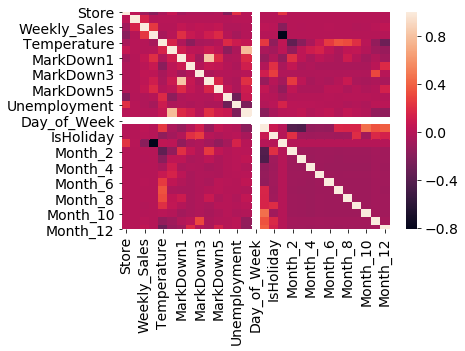

In [67]:
# Correlation Matrix - Train

corr_Train = Data_Final_Train.corr()
corr_Train.to_csv('corr_Train.csv')
sns.heatmap(corr_Train)

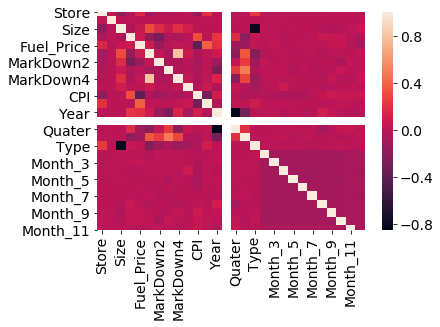

In [68]:
# Correlation Matrix - Test

corr_Test = Data_Final_Test.corr()
corr_Test.to_csv('corr_Test.csv')
sns.heatmap(corr_Test)

#### Observation - As per Heat Map and Corr Matrix

Day_of_Week has Null Values - Eliminate (Train Data & Test Data)

In [69]:
Data_Final_Train = Data_Final_Train.drop(columns=['Day_of_Week'])
Data_Final_Test = Data_Final_Test.drop(columns=['Day_of_Week'])

#### Max Weekly Sales based on Store

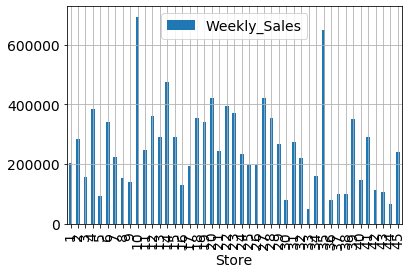

In [70]:
temp = Data_Final_Train.groupby(by=['Store'])
res1 = temp[['Weekly_Sales']].max()
res1.plot(kind='bar',fig=(10,15))

#### Min Weekly Sales based on Store

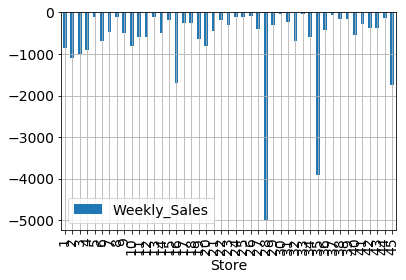

In [71]:
temp_min = Data_Final_Train.groupby(by=['Store'])
res2 = temp_min[['Weekly_Sales']].min()
res2.plot(kind='bar',fig=(10,15))

#### Average weekly Sales based on Store

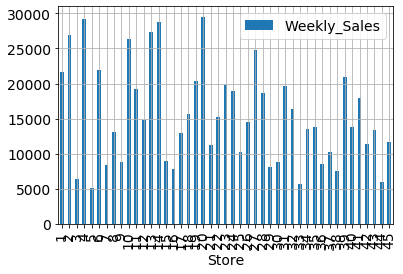

In [72]:
temp_avg = Data_Final_Train.groupby(by=['Store'])
res3 = temp_avg[['Weekly_Sales']].mean()
res3.plot(kind='bar',fig=(10,15))

#### Median Weekly Sales based on Store

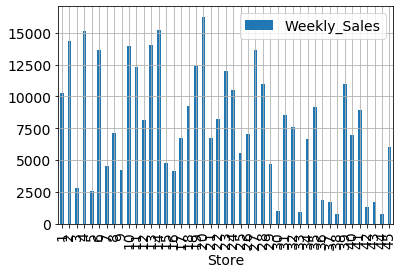

In [73]:
temp_median = Data_Final_Train.groupby(by=['Store'])
res4 = temp_median[['Weekly_Sales']].median()
res4.plot(kind='bar',fig=(10,15))

#### Standard Weekly Sales based on Store

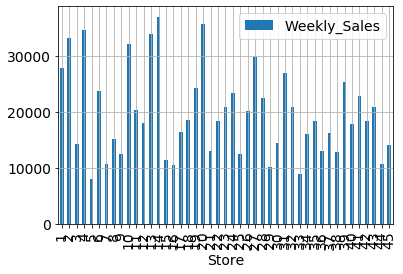

In [74]:
temp_std = Data_Final_Train.groupby(by=['Store'])
res5 = temp_std[['Weekly_Sales']].std()
res5.plot(kind='bar',fig=(10,15))

#### Nomality Check - Y [Weekly Sales]

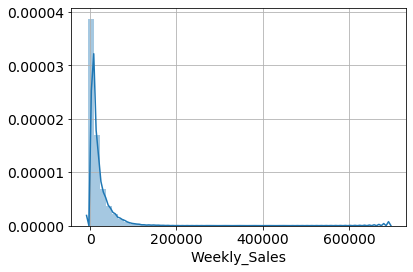

In [75]:
sns.distplot(Data_Final_Train.Weekly_Sales)

### Data Preparation Stage 3 - Feature Engineering - Feature Selection - Variable Reduction

#### Using Regularization for performing Feature Reduction

1. Linear Regression
2. XGBoost Regression
3. Random Forest Classifier
4. Corr Data
5. VIF

#### 1. Corr Data - Feature Selection

###  List of Important Varaiable using Corr Data Set
<br>Size</br> Type
Dept
Storem
MarkDown5
MarkDown1
Month_12
MarkDown3
MarkDown4
Unemployment
Quater
CPI
MarkDown2
Month_11
IsHoliday
Month_9
Month_10
Year

In [76]:
#Calculating CV for all the variables and deleting Variable having cv_vars<0.05

cv_vars = Data_Final_Train[Data_Final_Train.columns.difference(['Date'])].apply(lambda x: np.mean(x)/np.std(x) )
data = pd.DataFrame(cv_vars)

In [77]:
cv_variable = data.sort_values(by=[0],ascending=False)
cv_variable = cv_variable.rename(columns={0:'Variable'})

In [78]:
cv_variable

,Variable
Year,2523.568195
Fuel_Price,7.330259
CPI,4.371944
Unemployment,4.272160
Temperature,3.257283
Type,2.386052
Quater,2.317440
Size,2.242158
Store,1.736414
Dept,1.451538


In [79]:
feature_columns = Data_Final_Train.columns.difference(['Weekly_Sales', 'Date'])
# Creating Train and Test Dataset

X = Data_Final_Train[feature_columns]
Y = Data_Final_Train['Weekly_Sales']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=123)

#### RFE (Recursive Feature Elimination)

In [80]:
regressor = RandomForestRegressor()
rfe = RFE(regressor, 20)
rfe = rfe.fit(X_train, Y_train )
imp_vars_RFE = list(X.columns[rfe.support_])
imp_vars_RFE

['CPI',
 'Dept',
 'Fuel_Price',
 'IsHoliday',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'Month_11',
 'Month_12',
 'Month_2',
 'Month_4',
 'Month_8',
 'Quater',
 'Size',
 'Store',
 'Temperature',
 'Type',
 'Unemployment']

#### Select K Best

In [81]:
SKB = SelectKBest(f_classif, k=20).fit(X_train, Y_train )
SKB.get_support()
imp_vars_SKB = list(X.columns[SKB.get_support()])
imp_vars_SKB

['CPI',
 'Dept',
 'Fuel_Price',
 'IsHoliday',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'Month_10',
 'Month_11',
 'Month_12',
 'Month_6',
 'Month_8',
 'Month_9',
 'Quater',
 'Size',
 'Store',
 'Temperature',
 'Year']

#### XGBoost Feature Selection

In [89]:
import xgboost
xg =xgboost.XGBRegressor(random_state=1234)
xg = xg.fit(X_train,Y_train)

In [100]:
#Identifying Key variables and Printing top 20 variables.
feature_importances_XG = pd.DataFrame(xg.feature_importances_,
                                   index =X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
XG = pd.DataFrame(feature_importances_XG)
XG =XG.head(20)
lis_xg= list(XG.index)
lis_xg

['Dept',
 'Size',
 'Month_11',
 'Type',
 'Store',
 'IsHoliday',
 'Month_12',
 'Month_8',
 'MarkDown3',
 'CPI',
 'Quater',
 'Month_4',
 'Unemployment',
 'Month_5',
 'Year',
 'Temperature',
 'Month_6',
 'MarkDown4',
 'Month_7',
 'MarkDown5']

#### Random Forest Feature Selection

In [96]:
#Feature Selection using Random Forest.
rf = ensemble.RandomForestRegressor(random_state=1234,max_depth=3)
rf = rf.fit(X_train,Y_train)

In [101]:
#Identifying Key variables and Printing top 20 variables.
feature_importances_RF = pd.DataFrame(rf.feature_importances_,
                                   index =X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
RF = pd.DataFrame(feature_importances_RF)
RF = RF.head(20)
lis_rf= list(RF.index)
lis_rf

['Dept',
 'Size',
 'CPI',
 'Month_4',
 'Unemployment',
 'Type',
 'Temperature',
 'Store',
 'Quater',
 'Month_9',
 'Month_8',
 'Month_7',
 'Month_6',
 'Month_5',
 'Month_3',
 'Month_2',
 'Month_12',
 'Month_11',
 'Month_10',
 'MarkDown5']

In [102]:
Final_list = list(set(imp_vars_SKB  + imp_vars_RFE + lis_rf + lis_xg))

In [103]:
Final_list

['CPI',
 'Month_12',
 'Month_9',
 'Month_5',
 'Dept',
 'Fuel_Price',
 'Month_3',
 'Quater',
 'Month_7',
 'Year',
 'Store',
 'MarkDown1',
 'Month_6',
 'Type',
 'Month_8',
 'Month_11',
 'Size',
 'MarkDown5',
 'Month_4',
 'MarkDown4',
 'Temperature',
 'Month_10',
 'MarkDown2',
 'MarkDown3',
 'IsHoliday',
 'Unemployment',
 'Month_2']

In [104]:
X = Data_Final_Train[Final_list]
X_Test = Data_Final_Test[Final_list]

In [105]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

      VIF Factor      features
0   1.476228e+00           CPI
1   1.837210e+07      Month_12
2   1.050559e+07       Month_9
3   2.420600e+06       Month_5
4   1.000720e+00          Dept
5   4.253566e+00    Fuel_Price
6   2.894925e+00       Month_3
7   2.110769e+08        Quater
8   1.122883e+07       Month_7
9   4.551888e+00          Year
10  1.143755e+00         Store
11  3.338888e+00     MarkDown1
12  2.613405e+06       Month_6
13  3.064150e+00          Type
14  1.045870e+07       Month_8
15  1.455689e+07      Month_11
16  3.096218e+00          Size
17  1.118963e+00     MarkDown5
18  2.832950e+06       Month_4
19  3.251166e+00     MarkDown4
20  3.586412e+00   Temperature
21  2.364799e+07      Month_10
22  1.185426e+00     MarkDown2
23  1.196069e+00     MarkDown3
24  1.361665e+00     IsHoliday
25  1.441141e+00  Unemployment
26  2.684149e+00       Month_2


#### Define Training & Testing Data

In [106]:
#### train X= All X-Variable except Weekly_Sales and Date
train_X = X

#### train Y=  Weekly_Sales 

train_y = Data_Final_Train['Weekly_Sales'] 

#### test X 
test_X = X_Test

train_X.shape, train_y.shape, test_X.shape

((421570, 27), (421570,), (115064, 27))

### Model Building 

#### 1. Linear Regression

In [107]:
lr = linear_model.LinearRegression()
lr = lr.fit(train_X,train_y)

In [108]:
y_pred_linear=lr.predict(test_X)

In [109]:
acc_linear=round( lr.score(train_X, train_y) * 100, 2)
print ('score:'+str(acc_linear) + 'percent')

score:9.08percent


<Figure size 288x288 with 0 Axes>

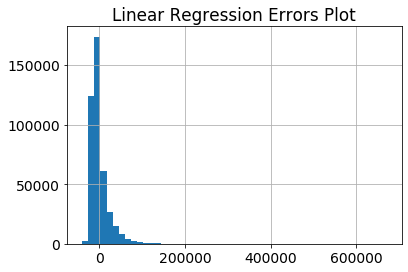

<Figure size 288x288 with 0 Axes>

In [110]:
#Checking Error Distribution :
(train_y-lr.predict(train_X)).hist(bins=50)
plt.title("Linear Regression Errors Plot")
plt.figure(figsize=(4,4))

#### 2. Decision Trees

In [111]:
#decision tree with tuning parameters.
param_dt = {'max_depth': [5,6,7,8,10],'max_features':[8,12,15,20]}
dt = GridSearchCV(estimator=tree.DecisionTreeRegressor(random_state=1234), param_grid=param_dt, cv=3,verbose=True, n_jobs=-1)
dt = dt.fit(train_X,train_y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   17.2s finished


In [113]:
pred_dt_train = dt.predict(train_X)
y_pred_tree = dt.predict(test_X)

In [114]:
#Checking Accuracy for train and Test data
print(dt.score(train_X,train_y))

0.8423395649868031


In [115]:
acc_df = round(dt.score(train_X, train_y) * 100, 2)
print ("Accuracy: %i %% \n"%acc_df)

Accuracy: 84 % 



<Figure size 288x288 with 0 Axes>

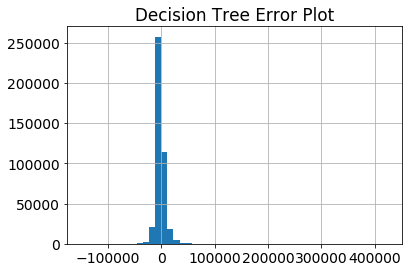

<Figure size 288x288 with 0 Axes>

In [116]:
#Checking Error Distribution :
(train_y-pred_dt_train).hist(bins=50)
plt.title("Decision Tree Error Plot")
plt.figure(figsize=(4,4))

#### 3. Random Forest

In [117]:
#Building Random Forest model with different Tuning parameters
param_rf = {'n_estimators': [100,150,200],'max_depth':[5,6,7]}
rf = GridSearchCV(estimator=ensemble.RandomForestRegressor(), param_grid=param_rf, cv=3,verbose=True, n_jobs=-1)
rf= rf.fit(train_X,train_y)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 14.9min finished


In [133]:
#Predicting values for train and test 
pred_rf_train = rf.predict(train_X)
y_pred_rf = rf.predict(test_X)

In [197]:
#Checking Accuracy for train and Test data
print(rf.score(train_X,train_y))
print(rf.score(test_X,y_pred_rf))

0.7651051100238505
1.0


In [131]:
acc_rf = round(rf.score(train_X, train_y) * 100, 2)
print ("Accuracy: %i %% \n"%acc_rf)

Accuracy: 76 % 



<Figure size 288x288 with 0 Axes>

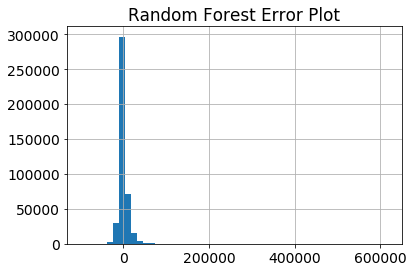

<Figure size 288x288 with 0 Axes>

In [134]:
#Checking Error Distribution :
(train_y-pred_rf_train).hist(bins=50)
plt.title("Random Forest Error Plot")
plt.figure(figsize=(4,4))

#### 4. XG Boost

In [119]:
#Building Model with different tuning parameters.
param_xg = {'n_estimators': [250,300,400],'max_depth':[8,10]}
xg = GridSearchCV(estimator=xgboost.XGBRegressor(), param_grid = param_xg, cv=3,verbose=True, n_jobs=-1)
xg = xg.fit(train_X,train_y)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 38.9min finished


In [137]:
#Predicting values for train and te
pred_xg_train = xg.predict(train_X)
y_pred_xg = xg.predict(test_X)

In [138]:
print(xg.score(train_X,train_y))

0.9872318520544965


In [139]:
acc_xg = round(xg.score(train_X, train_y) * 100, 2)
print ("Accuracy: %i %% \n"%acc_xg)

Accuracy: 98 % 



<Figure size 288x288 with 0 Axes>

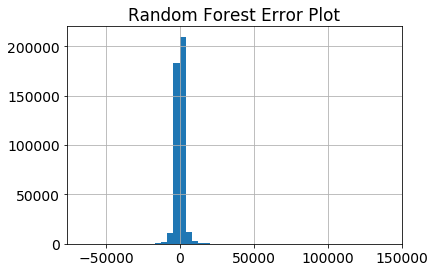

<Figure size 288x288 with 0 Axes>

In [125]:
#Checking Error Distribution :
(train_y-pred_xg_train).hist(bins=50)
plt.title("Random Forest Error Plot")
plt.figure(figsize=(4,4))

#### Compare Models

In [135]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Decision Tree','Random Forest','XG Boost'],
    
    'Score': [acc_linear, acc_df,acc_rf,acc_xg]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
3,XG Boost,98.72
1,Decision Tree,84.23
2,Random Forest,76.57
0,Linear Regression,9.08


#### Observation

As per above Model Selction we will use <b>XGBoost</b> to predict the Sales for Test Data

In [128]:
Results = pd.DataFrame()
Results['XGBoost_Predictions'] = xg.predict(X_Test)

In [129]:
Results

,XGBoost_Predictions
0,32107.031250
1,50330.269531
2,8785.908203
3,32875.304688
4,31942.679688
...,...
115059,712.317993
115060,1782.236206
115061,51466.359375
115062,6324.248535


#### Exporting results into Excel

In [136]:
Results.to_excel("Result.xlsx")

In [140]:
submission = pd.DataFrame({
        "Store_Dept_Date": Data_Final_Test.Store.astype(str)+'_'+Data_Final_Test.Dept.astype(str)+'_'+Data_Final_Test.Date.astype(str),
        "Weekly_Sales": y_pred_xg
    })

In [142]:
submission.to_excel('Fianl_Sales_Forecast.xlsx')

In [144]:
submission

,Store_Dept_Date,Weekly_Sales
0,1_1_2012-11-02,32107.031250
1,1_2_2012-11-02,50330.269531
2,1_3_2012-11-02,8785.908203
3,1_4_2012-11-02,32875.304688
4,1_5_2012-11-02,31942.679688
...,...,...
115059,45_93_2013-07-26,712.317993
115060,45_94_2013-07-26,1782.236206
115061,45_95_2013-07-26,51466.359375
115062,45_97_2013-07-26,6324.248535


In [147]:
Data_Final_Test.shape

(115064, 28)


### Time Series Model - Validation

In [168]:
features = ['Weekly_Sales','Date']
Sales_Data = Data_Final_Train[features]

In [169]:
Sales_Data

,Weekly_Sales,Date
0,24924.50,2010-02-05
1,50605.27,2010-02-05
2,13740.12,2010-02-05
3,39954.04,2010-02-05
4,32229.38,2010-02-05
...,...,...
421565,2487.80,2012-10-26
421566,5203.31,2012-10-26
421567,56017.47,2012-10-26
421568,6817.48,2012-10-26


In [185]:
temp = Sales_Data.groupby(by=['Date'])
Sales_Data_ts = temp[['Weekly_Sales']].mean()
Sales_Data_Final = Sales_Data_ts.reset_index()
Sales_Data_Final

,Date,Weekly_Sales
0,2010-02-05,16836.121997
1,2010-02-12,16352.056032
2,2010-02-19,16216.658979
3,2010-02-26,14899.549688
4,2010-03-05,15921.015727
...,...,...
138,2012-09-28,14765.327279
139,2012-10-05,15983.413747
140,2012-10-12,15427.596739
141,2012-10-19,15295.732397


In [186]:
Sales_Data_Final = np.where(Sales_Data_Final.Weekly_Sales<0,0,Sales_Data_Final.Weekly_Sales)

### Observation

We have considered if any Weekly Sales Data is Negative hence that values should be minimzed to 0

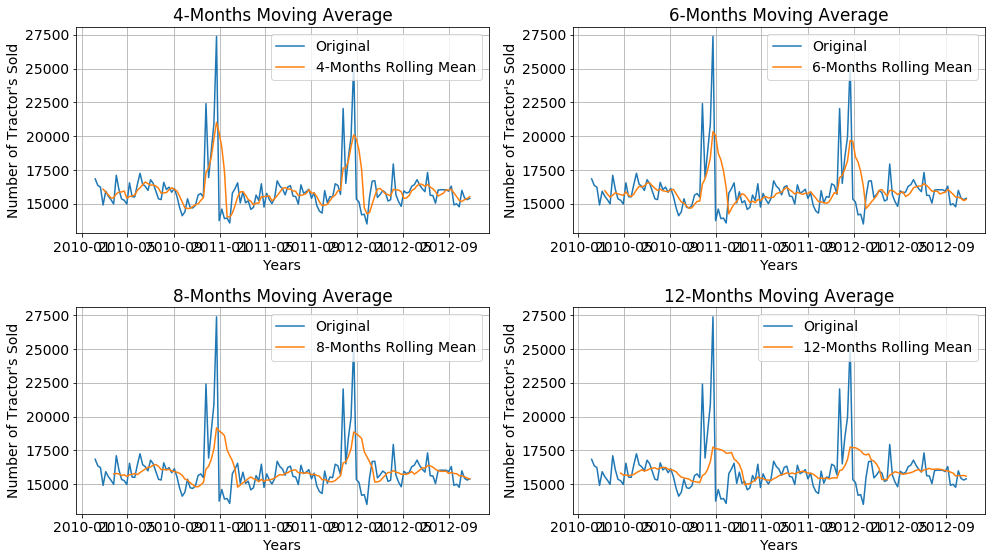

In [176]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(Sales_Data_ts.index, Sales_Data_ts, label='Original')
axes[0][0].plot(Sales_Data_ts.index, Sales_Data_ts.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Number of Tractor's Sold")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(Sales_Data_ts.index, Sales_Data_ts, label='Original')
axes[0][1].plot(Sales_Data_ts.index, Sales_Data_ts.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Number of Tractor's Sold")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(Sales_Data_ts.index, Sales_Data_ts, label='Original')
axes[1][0].plot(Sales_Data_ts.index, Sales_Data_ts.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Number of Tractor's Sold")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(Sales_Data_ts.index, Sales_Data_ts, label='Original')
axes[1][1].plot(Sales_Data_ts.index, Sales_Data_ts.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Number of Tractor's Sold")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

### Observation

Since the Data Provided is not following a Regular/Seassonal Trend with lot of Data below Negative hence its is very tiredsome to imeplement TimeSeries Forecatsing using <b>ARIMA/SARIMA</b>

Hence we chosen <b>Linear Regression Model</b> to predict the Sales Value for the Test Data